In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
comb = pd.merge(ride_df, city_df, on="city") 
# Display the data table for preview
comb.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [2]:
rd = comb.loc[comb["type"] == "Rural"]
ud = comb.loc[comb["type"] == "Urban"]
sd = comb.loc[comb["type"] == "Suburban"]
r_data = pd.DataFrame({"Fare_avg":rd.groupby("city")["fare"].mean(),
                       "Ride_count":rd.groupby("city")["ride_id"].count(),
                       "Driver_count":rd.groupby("city")["driver_count"].mean()
                    })
u_data = pd.DataFrame({"Fare_avg":ud.groupby("city")["fare"].mean(),
                       "Ride_count":ud.groupby("city")["ride_id"].count(),
                       "Driver_count":ud.groupby("city")["driver_count"].mean()
                    })
s_data = pd.DataFrame({"Fare_avg":sd.groupby("city")["fare"].mean(),
                       "Ride_count":sd.groupby("city")["ride_id"].count(),
                       "Driver_count":sd.groupby("city")["driver_count"].mean()
                    })

## Bubble Plot of Ride Sharing Data

Text(42,28,'Circle size co-relates with the driver count per city')

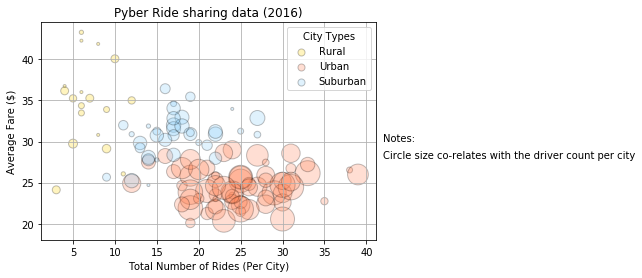

In [3]:
# Obtain the x and y coordinates for each of the three city types
colors=["gold", "lightskyblue", "coral"]
# Build the scatter plots for each city types

fig, axis = plt.subplots()
#fig, axis = plt.subplots(figsize=(25, 20))

axis.scatter(r_data["Ride_count"], r_data["Fare_avg"], marker="o", facecolor="gold", edgecolors="black",
            s=r_data["Driver_count"]*9, alpha=0.25, label="Rural")
axis.scatter(u_data["Ride_count"], u_data["Fare_avg"], marker="o", facecolor="coral", edgecolors="black",
            s=u_data["Driver_count"]*9, alpha=0.25, label="Urban")
axis.scatter(s_data["Ride_count"], s_data["Fare_avg"], marker="o", facecolor="lightskyblue", edgecolors="black",
            s=s_data["Driver_count"]*9, alpha=0.25, label="Suburban")
 
# Create a legend
plt.title("Pyber Ride sharing data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
#axis.legend()
leg = axis.legend(title="City Types", loc="upper right", markerscale=0.5, scatterpoints=1, fontsize=10)
leg.legendHandles[0]._sizes = [50]
leg.legendHandles[1]._sizes = [50]
leg.legendHandles[2]._sizes = [50]

axis.grid(True)

plt.text(42, 30, "Notes:")
plt.text(42, 28, "Circle size co-relates with the driver count per city")


In [4]:
# Show plot
plt.show()

## Total Fares by City Type

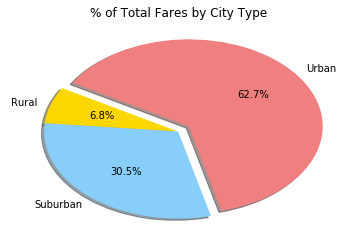

In [5]:
# Calculate Type Percents
count = comb.groupby("type")["fare"].sum()
count = count.reset_index()
size = count["fare"]
# Build Pie Chart
labels = count["type"].unique()
colors=["gold","lightskyblue","lightcoral"]
explode=[0,0,0.1]
plt.pie(size, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=150)
#plt.axis("equal")
plt.title("% of Total Fares by City Type")
# Save Figure
plt.savefig("Images/Tot_Fares_City_Type.png")

In [6]:
# Show Figure
plt.show()

## Total Rides by City Type

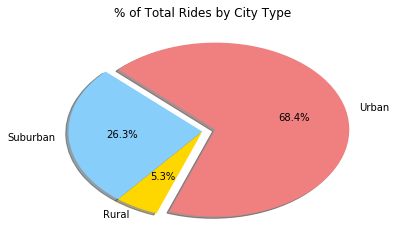

In [7]:
# Calculate Ride Percents
size = comb["type"].value_counts()
# Build Pie Chart
labels = comb["type"].unique()
colors=["lightcoral","lightskyblue","Gold"]
explode=[0.1,0,0]
plt.pie(size, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=250)
#plt.axis("equal")
plt.title("% of Total Rides by City Type")
# Save Figure
plt.savefig("Images/Tot_Rides_City_Type.png")

In [8]:
# Show Figure
plt.show()

## Total Drivers by City Type

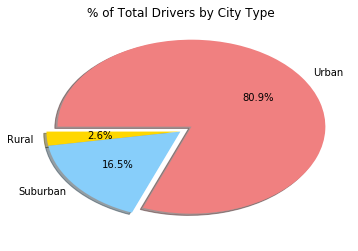

In [9]:
# Calculate Driver Percents
total = city_df.groupby("type")["driver_count"].sum()
total = total.reset_index()
size= total["driver_count"]
# Build Pie Charts
labels = total["type"]
colors=["Gold", "lightskyblue","lightcoral"]
explode=[0,0,0.1]
plt.pie(size, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=180)
#plt.axis("equal")
plt.title("% of Total Drivers by City Type")
# Save Figure
plt.savefig("Images/Tot_Drivers_City_Type.png")

In [10]:
# Show Figure
plt.show()

In [11]:
# Inferences
# Fares - Urban users contribute the most
# City Rides - Urban users use the majority of the services (close to 2 /3). Interesting as users are not using public services
# Total Drivers - As the # of rides in Urban is high
# Suburban - Although the total # of drivers are less compared to the urban users, the fare and rides are compareteively high. Should there be profit # we might be able to see if the sub-urban usage is yielding high profits for the company.
